# Homework 2
Justin Lau
04/04/2020
5:56pm

## Imports

In [94]:
import math
from math import factorial
import numpy as np
from numpy import zeros
import statistics
import matplotlib.pyplot as plt
import gmpy2
from gmpy2 import mpz
import bezier
from sympy import var, expand

## Question 1

In [86]:
#Defining the given f(x) functions for th rance of [0,1]
def f(x):
    if x <= 1/2:
        return x
    else:
        if x > 1/2 and x <= 1:
            return 1-x
#Definition of a Bernstein polynomial using f(x) function defined beforehand
def Bnf(n,x):
    return sum(f(k/n)*factorial(n)/(factorial(k)*factorial(n-k))*x**k*(1-x)**(n-k) for k in range(n+1))


[]

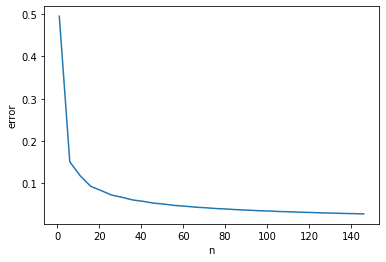

In [87]:
#list of values of n
degree = [] 
#list of values of sup(abs(f-bnf)), using error function
error = [] 
#values of x to iterate through
points = np.linspace(0,1,100)

for n in range(1,150,5): #testing varying values of n to 150, in increments of 5
    degree.append(n)
    #list if differences of abs(f-bnf), the max will then be chosen for the error
    sup = [] 
    for x in points:
        sup.append(abs(f(x)-Bnf(n,x)))
    error.append(max(sup))
    
plt.plot(degree,error)
plt.xlabel('n')
plt.ylabel('error')
plt.plot()

To try and get a linear relationship we can take a log of the dependent variable (aka the error)

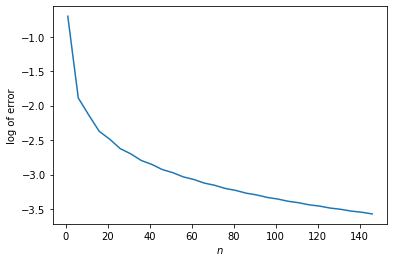

In [76]:
#Using Linear regression to get a better model
logerror = []
for i in error:
    logerror.append(math.log(i))
plt.plot(degree,logerror)
plt.xlabel('$n$')
plt.ylabel('log of error')
plt.show()

Another step that can be taken is to log n (degrees) to try and get a linear relationship, therefore giving the rate of convergence

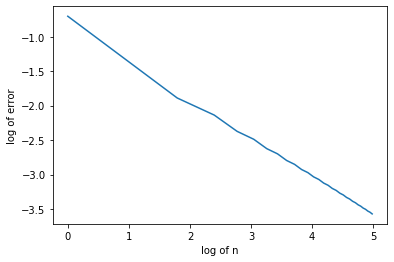

In [77]:
logdegree = []
for i in degree:
    logdegree.append(math.log(i))
plt.plot(logdegree,logerror)
plt.xlabel('log of n')
plt.ylabel('log of error')
plt.show()

The graph is pretty linear, so we can preform a linear regression test on log of error and log of n to get a rate of convergence

In [71]:
#find the slope of the best fit line
m, b = np.polyfit(np.array(logdegree),np.array(logerror), 1)
print(m)

-0.55775142839889


Can conclude that the rate of convergence is roughly n^(-1/2)

## Question 2

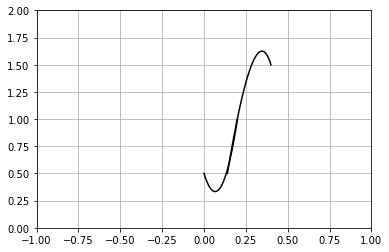

In [34]:
#Bottom part of the integral curve, using a quadratic bezier curve
nodes1 = np.array([[0,0.1,0.2],[0.5, 0, 1]]) 
curve1 = bezier.Curve(nodes1, degree=2) 

#Top part of the integral curve, using a quadratic bezier curve
nodes2 = np.array([[0.4,0.3,0.14],[1.5,2,.5]])
curve2 = bezier.Curve(nodes2, degree=2)

#number of points used in the curve between the the 3 given points
ax = curve1.plot(num_pts=256, color ='black')
_ = curve2.plot(num_pts=256, ax=ax, color='black')

#Set the visible window of the graph
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
plt.grid()
plt.show()

## Question 4a

In [39]:
from numpy.polynomial import chebyshev
from numpy import polynomial as P

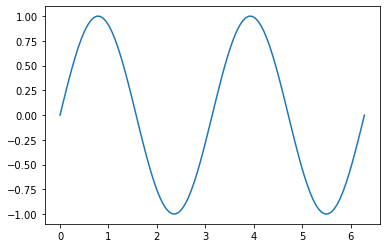

In [89]:
sin = []
x = []
#creating the sin(2x) graph
for i in np.arange(0,2*math.pi+2*math.pi/100, 2*math.pi/100):
    x.append(i)
    sin.append(math.sin(i*2))
plt.plot(x,sin)

Since the maximum error is sin(pi/4) = 1 and the minimum sin(3pi/4) = -1, we can see that it equioscillates between the maximum and minimum error 4 times if the polynomial is p(x) = 0. We can conclude that p(x) = 0 is the best uniform approximation for sin(2x) on [0,2pi].

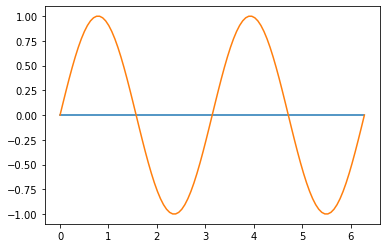

In [90]:
graph = []
#visualizing the p(x) = 0 on the sin(2x) graph
for i in np.arange(0,math.pi+math.pi/100, math.pi/100):
    graph.append(0)
plt.plot(x,graph)
plt.plot(x,sin)
plt.show()

## Problem 4B,5,6 in PDF

## Problem 7

[]

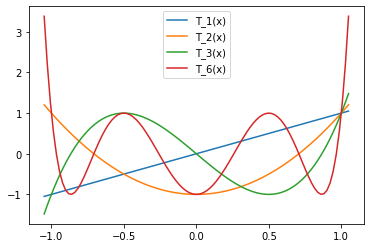

In [131]:
#Creating a chebyshev polynomial
def cheby(n,x):
    #values for if n = 0 and n = x
    T = [1,x]
    if n == 0:
        return 1
    # create new chebyshev polynomial until desired n value is reached
    count = 1
    while(count < n):
        #store all chebyshev polynomials in sequential order
        T.append(2*x*T[count]-T[count-1])
        count = count + 1
    return T[count]

#range of x that has the best visual representation
x = np.linspace(-1.05,1.05,100)

for i in range(1,4):
    T = 'T_'
    ix = '(x)'
    plt.plot(x,cheby(i,x), label = T+str(i)+ix)
plt.plot(x,cheby(6,x), label = 'T_6(x)')
plt.legend()
plt.plot()